# What is the mean weight of people in Melbourne?

## Population of interest

Everyone in Melbourne!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp # used for statistical tests
import random

random.seed(100)

## Population parameters (assumed)

Lets say the real mean Melbourne weight is 85kg (center) with a standard deviation of 5 (spread). Without doing a census (weighing everyone in Melbourne) these parameters are *unknown!* **Note the purpose of statistics is to use samples to *infer* the real unknown parameters of a *population of interest!**

In [2]:
# parameters of the population
mu, sigma = 85, 5

## Population distribution

With these parameters we thereofere can plot the real *unkown* distribution.

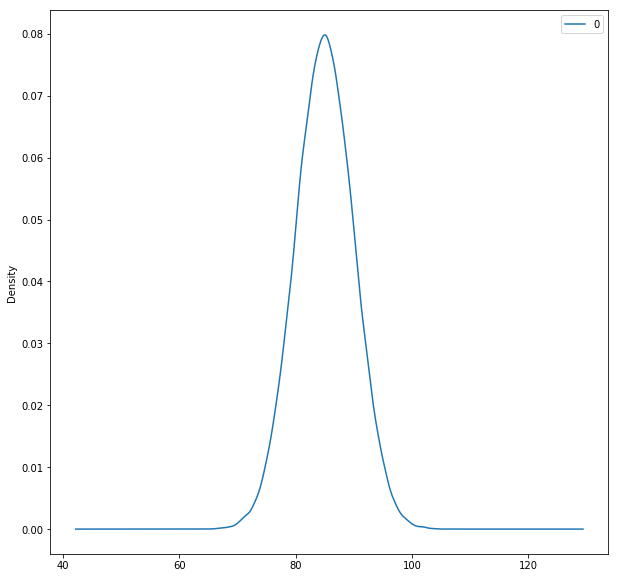

In [3]:
# randomly draw 100000 data points from the normal(85,5) pdf for plotting purposes
population = np.random.normal(mu, sigma, 100000)

# turn this into a pandas dataframe
population_df = pd.DataFrame(population)

# plot
population_df.plot(kind="density",
              figsize=(10,10))

In [4]:
population_df.head(10)

,0
0,83.849120
1,86.978371
2,85.862611
3,81.161372
4,83.222573
5,83.808505
6,85.504024
7,88.147885
8,85.508648
9,82.951199


## Sampling... from the population of interest!

Lets take a random sample of 1000 people from the population.

In [4]:
# random sample
pop_sample = population_df.sample(n = 1000, replace=False)

# look at the first 10
pop_sample.head()

,0
56173,92.313869
21139,87.513765
51546,92.038498
30161,84.862799
51521,86.746538


Lets plot this sample. Notice roughly the same shape as the distribution of the population of interest. What happens if we collect a larger sample? The *sample distribution* converges to the *population distribution!* Try it yourself!

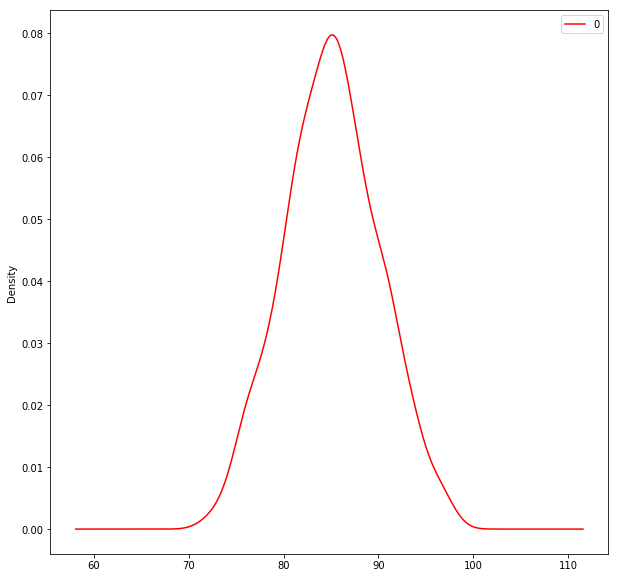

In [5]:
# plot
pop_sample.plot(kind="density",
              figsize=(10,10),
               color = "r")

# Hypothesis Testing

## Hypothesis 1

Null hypothesis (H0): The mean weight of people in Melbourne is = 70

Alternative hypothesis (HA): The mean weight of people in Melbourne is != 70


In [6]:
# Observed mean
pop_sample.mean()

0    85.053265
dtype: float64

To test this hypothesis we are going to use a *one-sample* t-test. Why???

In [7]:
test1 = sp.ttest_1samp(pop_sample, 70, axis=0)

print(test1.pvalue)

[0.]


p-value < 0.05 so we have **strong evidence against the null hypothesis** that the mean weight of people in melbourne is 70!

### Challenge!

What is the confidence interval for our estimate of the mean (the mean we saw)? Hint: Everything you need to calculate it is here.

## Hypothesis 2

Null hypothesis (H0): The mean weight of people in melbourne is = 85 

Alternative hypothesis (HA): The mean weight of people in melbourne is != 85

In [8]:
test2 = sp.ttest_1samp(pop_sample, 85, axis=0)

print(test2.pvalue)

[0.73539596]


p-value > 0.05 so we have **no evidence evidence against the null hypothesis** that the mean weight of people in melbourne is 85!